In [ ]:
def plot_sigmoid(min, max):
    import matplotlib.pyplot as plt 
    import numpy as np 

    z = np.linspace(min, max, 100) 
    def sigmoid(z):
        return 1/(1 + np.exp(-z))

    a = sigmoid(z)
    plt.plot(z, a) 
    plt.xlabel("z") 
    plt.ylabel("sigmoid(z)")

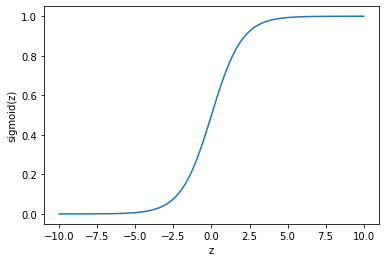

In [ ]:
plot_sigmoid(-10, 10)

In [2]:
import numpy as np
def cross_entropy_loss(y_true, y_pred):
    """
    INPUTS:
    y_true -> m x 1 dimensional vector
    y_pred -> m x 1 dimensional vector

    OUTPUTS:
    loss -> scalar
    """
    loss = (-1 / m) * (y_true.T.dot(y_pred) + (1 - y_true).T.dot(1 - y_pred))
    return loss

In [3]:
def sigmoid(arr):
    """
    Apply sigmoid function to each value in given vector.
    
    INPUTS:
    arr -> matrix/vector

    OUTPUTS:
    arr -> sigmoid applied to arr
    """

    arr = 1 / (1 + np.exp(-arr))
    return arr